In [1]:
# import liblaries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

>### Overview

In [2]:
#Load data
df = pd.read_csv('data/melb_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

## Outlier Detection
an outlier is a data point that significantly differs from the rest of the data in a dataset. It's like the rebel in the group, refusing to conform to the patterns exhibited by the majority of the data.
### How to detect outliers?
- Standar Deviation
- Boxplot & IQR Score
- Z-Score
>### 1. Using Box Plots
>Box plots are a graphical depiction of numerical data through their quantiles. It is a very simple but effective way to visualize outliers. Think about the lower and upper whiskers as the boundaries of the data distribution. Any data points that show above or below the whiskers, can be considered outliers or anomalous.
>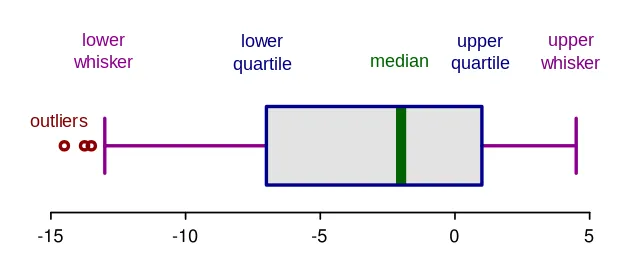!
>The concept of the Interquartile Range (IQR) is used to build the boxplot graphs. IQR is a concept in statistics that is used to measure the statistical dispersion and data variability by dividing the dataset into quartiles.
>
>In simple words, any dataset or any set of observations is divided into four defined intervals based upon the values of the data and how they compare to the entire dataset. A quartile is what divides the data into three points and four intervals.
>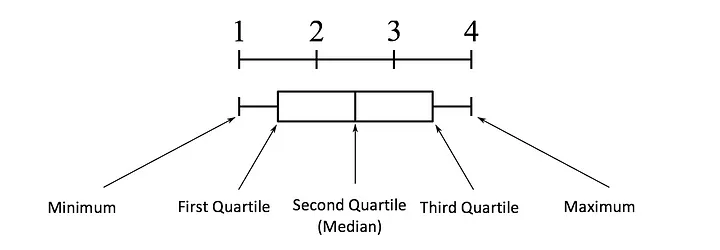!
>Interquartile Range (IQR) is important because it is used to define the outliers. It is the difference between the third quartile and the first quartile (IQR = Q3 -Q1). Outliers in this case are defined as the observations that are below (Q1 − 1.5x IQR) or boxplot lower whisker or above (Q3 + 1.5x IQR) or boxplot upper whisker.
>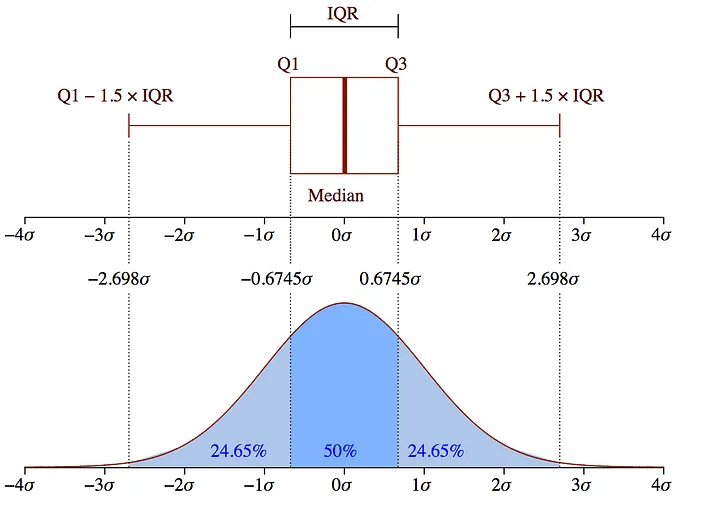

In [4]:
#split numeric and object data
df_num = df.select_dtypes(include = ['int64', 'float64']) 
# bisa menggunakan (exclude = 'object') object disini adalah tipe data nya

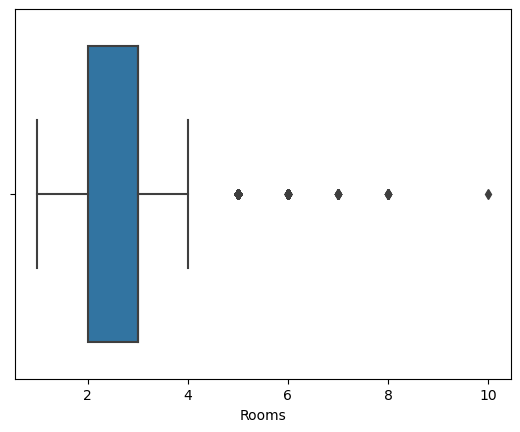

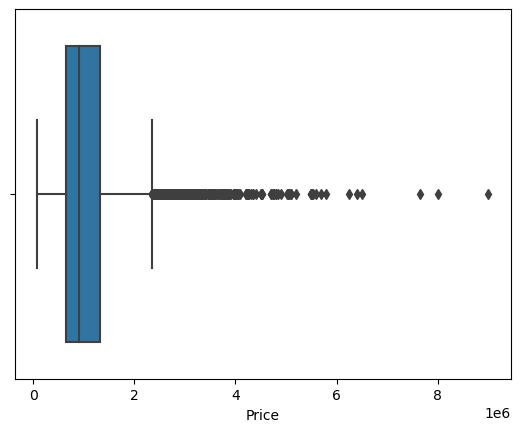

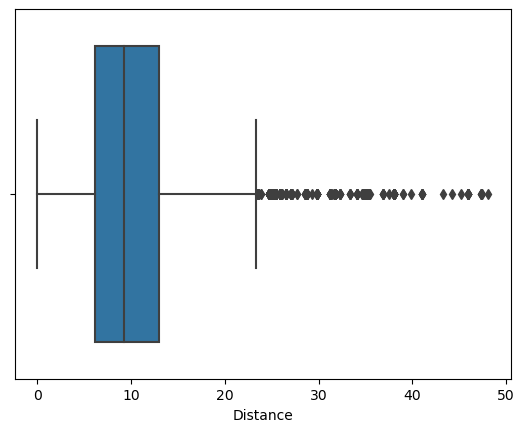

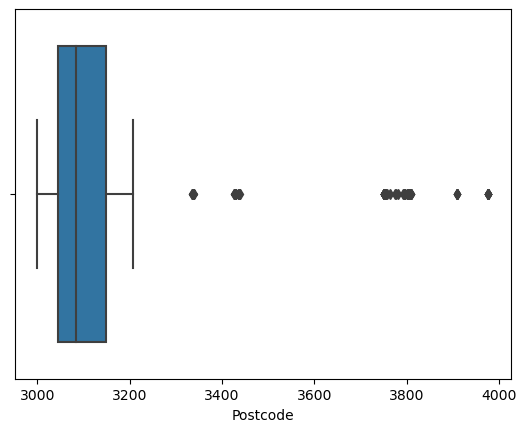

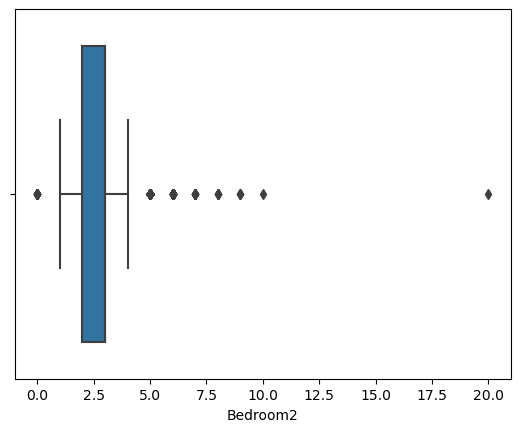

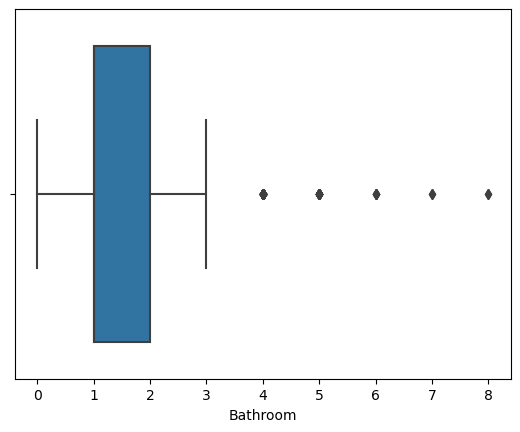

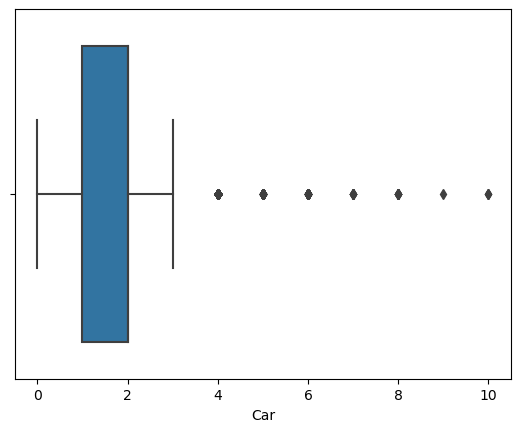

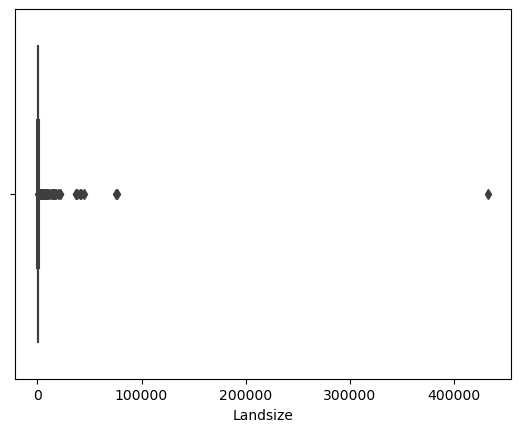

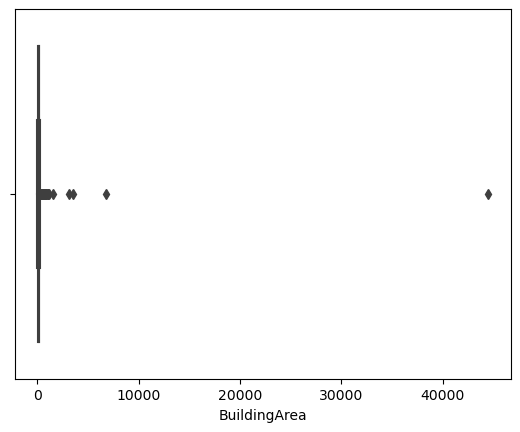

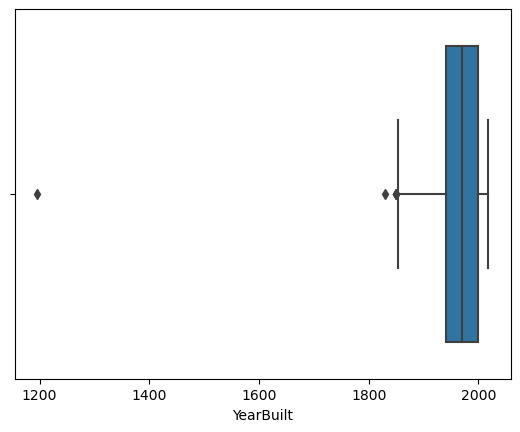

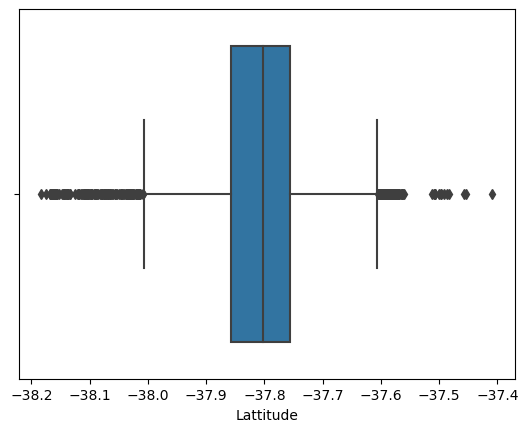

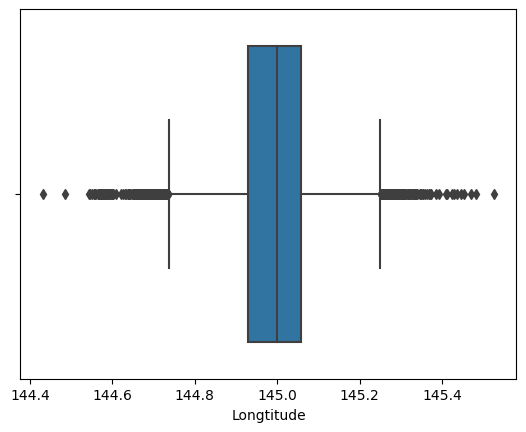

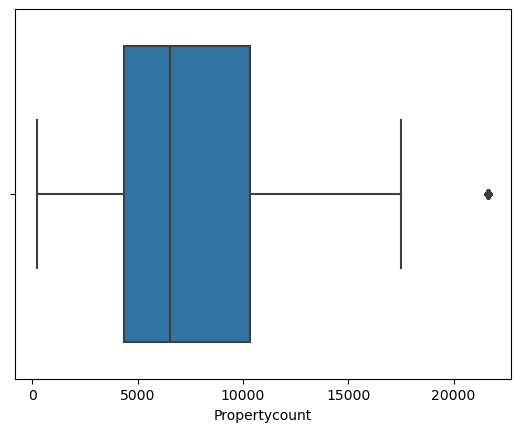

In [5]:
# detecting using boxplot
for i in df_num:
    sns.boxplot(data= df_num, x=i)
    plt.show()

>we have detected in these column
>
>we will handle this later

In [6]:
# function to find outliers, using numpy
def find_outlier(yourList):
    Q1 = np.quantile(yourList, .25)
    Q2 = np.quantile(yourList, .50) #median
    Q3 = np.quantile(yourList, .75)
    
    IQR = (Q3 - Q1) * 1.5
    batas_bawah = Q1 - IQR
    batas_atas = Q3 + IQR
    
    outlier = ''
    for i in range(len(yourList)):
        if yourList[i] > batas_atas:
            outlier = outlier + str(yourList[i]) + ', '
        if yourList[i] < batas_bawah:
            outlier = outlier + str(yourList[i]) + ', '
    return outlier

In [7]:
# find outlier in distance variable
distance = df['Distance'].sort_values().values.tolist()
print('Jumlah outlier feature distance yaitu:', len(find_outlier(distance)))

Jumlah outlier feature distance yaitu: 2466


In [8]:
# find outlier in price variable
price = df['Price'].sort_values().values.tolist()
print('Jumlah outlier feature distance yaitu:', len(find_outlier(price)))

Jumlah outlier feature distance yaitu: 6732


In [9]:
# function to find outliers, using numpy 2
def find_outlier2(data):
    
    # Hitung nilai Q1 dan Q3
    Q1 = np.quantile(data, .25)
    Q3 = np.quantile(data, .75)
    
    # Hitung nilai IQR
    IQR = Q3 - Q1
    min_IQR = Q1 - 1.5 * IQR
    max_IQR = Q3 + 1.5 * IQR
    
    nilai_min = np.min(data)
    nilai_max = np.max(data)
    
    low_out = []
    high_out = []
    
    for i in data:
        if (i < min_IQR):
            low_out.append(i)
        if (i > max_IQR):
            high_out.append(i)
            
    return print('Lower outlier : ', low_out, '|| High outlier : ', high_out)

In [10]:
# find outliers in distance variable
print(find_outlier2(distance))

Lower outlier :  [] || High outlier :  [23.5, 23.5, 23.5, 23.5, 23.5, 23.5, 23.5, 23.5, 23.5, 23.5, 23.8, 23.8, 24.7, 24.7, 24.7, 24.7, 24.7, 24.7, 24.7, 24.7, 24.7, 24.7, 24.7, 24.7, 24.7, 24.7, 24.7, 24.7, 24.7, 24.7, 24.7, 24.7, 24.7, 24.7, 24.7, 24.7, 24.7, 24.7, 24.7, 24.7, 24.7, 24.8, 24.8, 24.8, 24.8, 24.8, 24.8, 24.8, 24.8, 24.8, 24.8, 24.8, 24.8, 24.8, 24.8, 24.8, 24.8, 24.8, 24.8, 24.8, 24.8, 24.8, 24.8, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.2, 25.2, 25.2, 25.2, 25.2, 25.2, 25.2, 25.2, 25.2, 25.2, 25.2, 25.2, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.9, 25.9, 25.9, 25.9, 25.9, 25.9, 25.9, 25.9, 25.9, 25.9, 25.9, 25.9, 25.9, 25.9, 25.9, 26.0, 26.0, 26.0, 26.0, 26.1, 26.1, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.1, 27.1, 27.2, 

In [11]:
# find outliers in price variable
print(find_outlier2(price))

Lower outlier :  [] || High outlier :  [2352500.0, 2355000.0, 2355000.0, 2355000.0, 2360000.0, 2360000.0, 2360000.0, 2360000.0, 2361000.0, 2365000.0, 2365000.0, 2367000.0, 2368000.0, 2368000.0, 2370000.0, 2370000.0, 2370000.0, 2375000.0, 2375000.0, 2375000.0, 2375000.0, 2375000.0, 2375000.0, 2376000.0, 2380000.0, 2380000.0, 2381000.0, 2385000.0, 2385000.0, 2385000.0, 2385000.0, 2390000.0, 2395000.0, 2400000.0, 2400000.0, 2400000.0, 2400000.0, 2400000.0, 2400000.0, 2400000.0, 2400000.0, 2400000.0, 2400000.0, 2400000.0, 2400000.0, 2400000.0, 2400000.0, 2400000.0, 2400000.0, 2400000.0, 2400000.0, 2400000.0, 2400000.0, 2400000.0, 2400000.0, 2400000.0, 2400000.0, 2400000.0, 2400000.0, 2400000.0, 2402500.0, 2405000.0, 2405000.0, 2405000.0, 2408000.0, 2410000.0, 2410000.0, 2410000.0, 2410000.0, 2410000.0, 2412000.0, 2415000.0, 2415000.0, 2415000.0, 2420000.0, 2420000.0, 2425000.0, 2425000.0, 2425000.0, 2425000.0, 2425000.0, 2430000.0, 2435000.0, 2439500.0, 2440000.0, 2440000.0, 2444000.0, 244

### 2. Z SCORE

In [12]:
# Liblary
from scipy import stats

In [13]:
# Z score check
z = np.abs(stats.zscore(distance))

#threshold = 2.5
print(np.where(z > 2.5))
print(np.where(z < -2.5))

(array([13232, 13233, 13234, 13235, 13236, 13237, 13238, 13239, 13240,
       13241, 13242, 13243, 13244, 13245, 13246, 13247, 13248, 13249,
       13250, 13251, 13252, 13253, 13254, 13255, 13256, 13257, 13258,
       13259, 13260, 13261, 13262, 13263, 13264, 13265, 13266, 13267,
       13268, 13269, 13270, 13271, 13272, 13273, 13274, 13275, 13276,
       13277, 13278, 13279, 13280, 13281, 13282, 13283, 13284, 13285,
       13286, 13287, 13288, 13289, 13290, 13291, 13292, 13293, 13294,
       13295, 13296, 13297, 13298, 13299, 13300, 13301, 13302, 13303,
       13304, 13305, 13306, 13307, 13308, 13309, 13310, 13311, 13312,
       13313, 13314, 13315, 13316, 13317, 13318, 13319, 13320, 13321,
       13322, 13323, 13324, 13325, 13326, 13327, 13328, 13329, 13330,
       13331, 13332, 13333, 13334, 13335, 13336, 13337, 13338, 13339,
       13340, 13341, 13342, 13343, 13344, 13345, 13346, 13347, 13348,
       13349, 13350, 13351, 13352, 13353, 13354, 13355, 13356, 13357,
       13358, 13359

In [14]:
# where is the data?
# finding location
outlier_loc = [13232, 13233, 13234, 13235, 13236, 13237, 13238, 13239, 13240]

In [15]:
# finding outliers using loop
outlier_data = []
for i in range(len(outlier_loc)):
    outlier_data.append(distance[i])

In [16]:
# print z score result
outlier_data

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.7, 0.7, 0.7]

In [17]:
df.loc[outlier_loc]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
13232,Mitcham,1 Dunlavin Rd,4,h,890000.0,S,Buxton,23/09/2017,17.2,3132.0,...,2.0,2.0,481.0,166.0,1965.0,NaN,-37.80961,145.18470,Eastern Metropolitan,6871.0
13233,Mitcham,2 Hardwood Ct,5,h,1150000.0,S,Fletchers,23/09/2017,17.2,3132.0,...,2.0,2.0,588.0,NaN,1970.0,NaN,-37.81153,145.18550,Eastern Metropolitan,6871.0
13234,Mitcham,2/491 Mitcham Rd,3,h,902000.0,PI,Ray,23/09/2017,17.2,3132.0,...,2.0,2.0,327.0,NaN,NaN,NaN,-37.82863,145.19506,Eastern Metropolitan,6871.0
13235,Moonee Ponds,8 Pattison St,3,h,1162000.0,S,Jellis,23/09/2017,6.2,3039.0,...,1.0,2.0,619.0,129.0,1965.0,NaN,-37.76996,144.93466,Western Metropolitan,6232.0
13236,Mooroolbark,4 Bulga St,3,h,835000.0,S,hockingstuart,23/09/2017,26.5,3138.0,...,2.0,1.0,940.0,NaN,NaN,NaN,-37.77403,145.30445,Eastern Victoria,8280.0
13237,Mount Waverley,2 Ormiston St,4,h,1400000.0,S,Ray,23/09/2017,14.2,3149.0,...,2.0,2.0,664.0,NaN,NaN,NaN,-37.86301,145.14145,Eastern Metropolitan,13366.0
13238,Mount Waverley,34 Park La,3,h,1586000.0,S,Stockdale,23/09/2017,14.2,3149.0,...,1.0,1.0,718.0,138.0,1955.0,NaN,-37.88061,145.12449,Eastern Metropolitan,13366.0
13239,Mount Waverley,8 Susan Ct,4,h,1408000.0,S,Jellis,23/09/2017,14.2,3149.0,...,2.0,2.0,692.0,179.0,1970.0,NaN,-37.86445,145.12538,Eastern Metropolitan,13366.0
13240,Mulgrave,12 Brookland Ct,4,h,1080000.0,S,Ray,23/09/2017,18.8,3170.0,...,2.0,2.0,914.0,204.0,1980.0,NaN,-37.93173,145.19475,South-Eastern Metropolitan,7113.0


### Handling Outliers
>- Dropping
>- Rescale

In [18]:
# create dataframe
houses = pd.DataFrame()
houses['Price'] = [534433, 3923333, 293222, 4322032]
houses['Bathrooms'] = [2, 3.5, 2, 116]
houses['Square_Feet'] = [1500, 2500, 1500, 48000]

houses

,Price,Bathrooms,Square_Feet
0,534433,2.0,1500
1,3923333,3.5,2500
2,293222,2.0,1500
3,4322032,116.0,48000


### DROPPING

In [19]:
# Drop observations greater than some value
houses_clean = houses[houses['Bathrooms'] < 20]
houses_clean

,Price,Bathrooms,Square_Feet
0,534433,2.0,1500
1,3923333,3.5,2500
2,293222,2.0,1500


In [20]:
# location index using z score
z = np.abs(stats.zscore(distance))

In [21]:
# dropped outlier
outlier_loc = np.where(z > 2.5)[0].tolist()
df_dropped_outlier = df.loc[~df.index.isin(outlier_loc)]

In [22]:
df_dropped_outlier.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


### RESCALE - Not For Data Analysis

In [23]:
# Log feature
houses['Log_Of_Square_Feet'] = [np.log(x) for x in houses['Square_Feet']]

# Show Data
houses

,Price,Bathrooms,Square_Feet,Log_Of_Square_Feet
0,534433,2.0,1500,7.313220
1,3923333,3.5,2500,7.824046
2,293222,2.0,1500,7.313220
3,4322032,116.0,48000,10.778956


In [24]:
# Scalling using robust scaler
from sklearn.preprocessing import RobustScaler

houses['Square_Feet_Rbs'] = RobustScaler().fit_transform(houses[['Square_Feet']])

In [25]:
houses

,Price,Bathrooms,Square_Feet,Log_Of_Square_Feet,Square_Feet_Rbs
0,534433,2.0,1500,7.313220,-0.040404
1,3923333,3.5,2500,7.824046,0.040404
2,293222,2.0,1500,7.313220,-0.040404
3,4322032,116.0,48000,10.778956,3.717172


### REFERENCE
1. https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623
2. https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba